In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("/content/Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [32]:
X = data.iloc[:,2:4].values

In [33]:
X.shape

(400, 2)

In [34]:
y = data.iloc[:,-1].values

In [35]:
y.shape

(400,)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [38]:
X_train.shape

(320, 2)

In [39]:
X_test.shape

(80, 2)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [42]:
X_train

array([[ 0.03728336, -0.28668153],
       [-0.70260353,  1.96165601],
       [ 1.23959957,  2.28707328],
       [-0.33266008,  0.09790253],
       [-0.0552025 ,  2.2279065 ],
       [-1.44249043,  0.36415302],
       [ 0.49971267,  1.90248923],
       [-0.24017422, -1.35168351],
       [ 1.51705716, -1.26293335],
       [ 0.31474095, -0.70084897],
       [-0.24017422, -1.3812669 ],
       [ 0.03728336, -0.55293202],
       [ 0.31474095,  0.09790253],
       [ 0.77717026, -0.28668153],
       [ 1.79451474, -1.05584963],
       [ 1.23959957,  1.93207262],
       [ 1.14711371,  0.57123674],
       [ 0.31474095,  0.30498625],
       [-0.24017422, -0.90793269],
       [ 0.22225509,  2.16873973],
       [ 1.97948647,  1.81373906],
       [-0.42514595, -1.11501641],
       [-1.71994802, -1.29251674],
       [ 2.07197233,  1.16290452],
       [-1.81243388,  0.51206997],
       [ 1.97948647, -0.78959913],
       [-0.24017422, -0.28668153],
       [ 1.33208543,  0.63040352],
       [-1.35000457,

In [43]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.12976923, -0.78959913],
       [ 0.31474095,  0.33456964],
       [-0.24017422, -0.73043235],
       [-0.42514595,  2.37582345],
       [ 0.6846844 , -1.08543302],
       [ 0.03728336, -0.40501508],
       [-0.0552025 , -0.19793136],
       [-0.0552025 ,  0.27540286],
       [ 0.77717026,  1.42915501],
       [ 0.96214198, -0.81918252],
       [-0.98006112, -0.3458483 ],
       [-0.24017422,  2.31665667],
       [ 0.6846844 ,  1.84332245],
       [ 0.96214198,  1.84332245],
       [-0.79508939,  2.34624006],
       [-0.61011767, -0.31626491],
       [-0.0552025 ,  2.02082278],
       [-0.79508939, -1.20376657],
       [-1.25751871,  0.45290319],
       [ 0.22225509,  1.13332113],
       [ 0.77717026, -1.08543302],
       [-0.24017422,  0.12748592],
       [-0.88757526,  0.45290319],
       [-0.88757526, -0.28668153],
       [ 0.03728336, -0.22751475],
       [ 0.40722681, -0.10918119],
       [-1.07254698, -0.49376525],
       [-1.25751871, -0.40501508],
       [ 1.42457129,

1st method

In [44]:
np.sqrt(X_train.shape[0])

np.float64(17.88854381999832)

In [45]:
k = 17

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [47]:
# Train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [48]:
y_pred = knn.predict(X_test)

In [49]:
y_pred.shape

(80,)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.95

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[45,  2],
       [ 2, 31]])

2nd Method

In [53]:
accuracy = []

for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [55]:
len(accuracy)

25

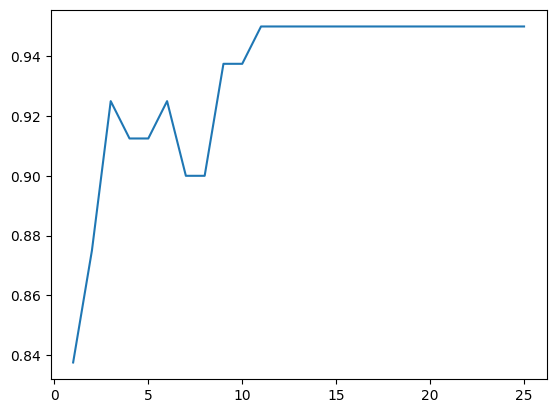

In [56]:
plt.plot(range(1,26),accuracy)

In [57]:
knn = KNeighborsClassifier(n_neighbors=12)

In [58]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=12)

In [63]:
y_pred = knn.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.95

In [73]:
def predict_output():
  age = int(input("Enter the age"))
  salary = int(input("Enter the salary"))

  X_new = np.array([[age],[salary]]).reshape(1,2)
  X_new = scaler.transform(X_new)

  if knn.predict(X_new)[0]==0:
    return "Will not purchase"

  else:
    return "Will purchase"

In [74]:
predict_output()

Enter the age26
Enter the salary45000


'Will not purchase'